# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


# Since We are to predict the total trip duration which is a continuous type variable I would use RMSE metric to evaluate my dataset.

# The reason behind it is that it is one of the most efficient evaluation metric used on regression problems and it is easy to understand and evaluate

In [3]:
# Performing the Exploratory Data Analysis on our dataset and getting ready our data for model building.

In [4]:
df.shape

(729322, 11)

In [5]:
# getting know the data types of variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [6]:
# also we can see that there are no missing values present in our dataset
# We have a more efficient way of looking for missing values

In [7]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
# Checking on the descriptive statistics of our database

df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [9]:
# Surely we can see that there are some large values present in our data(outliers)

In [10]:
# Let's see the distribution of trip_duration 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of trip duration')

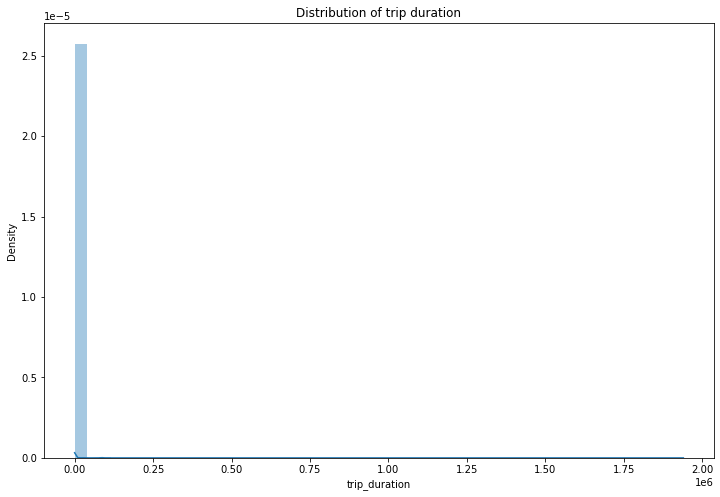

In [11]:
plt.figure(figsize = (12,8))
sns.distplot(df['trip_duration'])
plt.xlabel('trip_duration')
plt.title('Distribution of trip duration')

In [12]:
# Lets now treat the outliers from this column
# We will choose quantile method to treat the outliers. We will try to preserve maximum amount of data.


In [13]:
upper_limit = df['trip_duration'].quantile(0.99)
lower_limit = df['trip_duration'].quantile(0.01)
upper_limit , lower_limit

(3429.0, 87.0)

In [14]:
# We get to preserve 99% of data. Thats not bad considering the shape of our dataset

In [15]:
def outlier_treatment(value):
    if value <= upper_limit and value >= lower_limit:
        return value
    elif value > upper_limit:
        return upper_limit
    elif value < lower_limit:
        return lower_limit

In [16]:
df['trip_duration'] = df['trip_duration'].map(lambda trip_duration : outlier_treatment(trip_duration))

In [17]:
df['trip_duration'].describe()

count    729322.000000
mean        834.005354
std         627.798897
min          87.000000
25%         397.000000
50%         663.000000
75%        1075.000000
max        3429.000000
Name: trip_duration, dtype: float64

In [18]:
# The outlier treatment function worked!!!

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

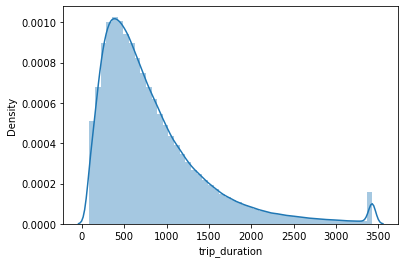

In [19]:
# Lets see the shape of our target variable.

sns.distplot(df['trip_duration'])

In [20]:
# It is still a rightly skewed variable, but after losing 1% information we can atleast see the shape of it.

In [21]:
# We got a datetime variable too. Lets look at that.

In [22]:
df['pickup_datetime'].describe()

count                  729322
unique                 709359
top       2016-05-20 09:03:18
freq                        4
Name: pickup_datetime, dtype: object

In [23]:
# to operate over it we need to convert it to a datetime object.

In [24]:
import datetime

In [25]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  729322 non-null  object        
 1   vendor_id           729322 non-null  int64         
 2   pickup_datetime     729322 non-null  datetime64[ns]
 3   dropoff_datetime    729322 non-null  datetime64[ns]
 4   passenger_count     729322 non-null  int64         
 5   pickup_longitude    729322 non-null  float64       
 6   pickup_latitude     729322 non-null  float64       
 7   dropoff_longitude   729322 non-null  float64       
 8   dropoff_latitude    729322 non-null  float64       
 9   store_and_fwd_flag  729322 non-null  object        
 10  trip_duration       729322 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(2)
memory usage: 61.2+ MB


In [27]:
# We successfully converted them into datetime

In [28]:
# now we extract essential information from them.

In [29]:
df['weekday'] = df['pickup_datetime'].dt.weekday
df['hour_of_day'] = df['pickup_datetime'].dt.hour
df['month'] = df['pickup_datetime'].dt.month

In [30]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour_of_day,month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,0,16,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,4,23,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,6,17,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,1,9,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,2,6,2


In [31]:
# we can see in our database that we have extracted weekday , hour_of_day , and month from datetime variable.

In [32]:
df['passenger_count'].unique()

array([1, 2, 6, 3, 4, 5, 0, 7, 9], dtype=int64)

In [33]:
# passenger count also varies from 0 to 9
# We should have atlest 1 passenger and a maximum of 6 passengers(including kids) may get into a taxi.

In [34]:
def outlier_treat(value):
    if value == 0 or value > 6:
        return 0
    else:
        return value

In [35]:
df['passenger_count'] = df['passenger_count'].map(lambda passenger_count:outlier_treat(passenger_count))

In [36]:
df['passenger_count'].describe()

count    729322.000000
mean          1.662033
std           1.312405
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [37]:
# Let us also focus on the variable store and fwd flag.

In [38]:
df['store_and_fwd_flag'].describe()

count     729322
unique         2
top            N
freq      725282
Name: store_and_fwd_flag, dtype: object

In [39]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [40]:
# we need to convert it to integers i.e. use get dmmies function.

In [41]:
Store_and_fwd_flag = pd.get_dummies(df['store_and_fwd_flag'] , prefix = 'store_and_fwd_flag')
df = pd.concat([df , Store_and_fwd_flag] , axis = 1)

In [42]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour_of_day,month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,0,16,2,1,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,4,23,3,1,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,6,17,2,1,0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,1,9,1,1,0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,2,6,2,1,0


In [43]:
# now we need to drop off a few of the rows to make or dataset ready.

In [44]:
df.drop(['id' , 'pickup_datetime' , 'dropoff_datetime' , 'store_and_fwd_flag'] , axis = 1 , inplace = True)

In [45]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,weekday,hour_of_day,month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400.0,0,16,2,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100.0,4,23,3,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635.0,6,17,2,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141.0,1,9,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848.0,2,6,2,1,0


In [46]:
df.drop(df[df['passenger_count'] == 0].index , inplace = True)
df.shape

(729287, 12)

In [47]:
# We successfully removed the zero passenger values

In [48]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,weekday,hour_of_day,month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400.0,0,16,2,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100.0,4,23,3,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635.0,6,17,2,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141.0,1,9,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848.0,2,6,2,1,0


In [49]:
# now our dataset is finally ready for model building.
# Let us save this dataset for future models

In [50]:
df.to_csv('cleaned_df.csv' , index = False)